# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

## **Business Understanding**

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The dataset provides ample opportunities to address business problems, including:

### Pricing Analysis:
- What factors influence the price of used vehicles?
- Can we predict a fair market price for a given vehicle based on its features?

### Market Trends:
- Which regions have higher demand for specific vehicle types or manufacturers?
- What are the popular models and manufacturers in different regions?

### Consumer Preferences:

- Do certain conditions (e.g., excellent vs. good) significantly affect vehicle prices?
- How does odometer reading correlate with vehicle pricing and desirability?

### Risk Assessment:
- Are there any patterns in title status (e.g., clean, salvage) and their impact on price?
- Can we identify potentially risky purchases based on incomplete or unusual data?


## **Data Understanding**

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import pandas as pd
from pandas import DataFrame
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import rcParams
from tqdm import tqdm
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import rc
import plotly.graph_objs as go
from sklearn import preprocessing
import matplotlib
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
import math
from sklearn.metrics import mean_squared_error as MSE
from sklearn import tree
from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO
from IPython.display import Image
# import pydotplus
from sklearn.ensemble import RandomForestRegressor

In [77]:
df = pd.read_csv("data/vehicles.csv") #reading the file

In [78]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [79]:
df.shape

(426880, 18)

In [5]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [80]:
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

heatmap to identify nulll values using graph

<Axes: >

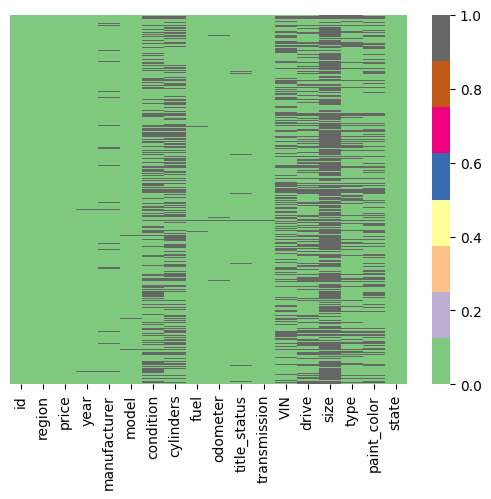

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='Accent')

In [81]:
null_val = df.isna().sum()
def na_filter(na, threshold = .55): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/df.shape[0]<threshold:
            col_pass.append(i)
    return col_pass
vehicles_cleaned = df[na_filter(null_val)]
vehicles_cleaned.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'type', 'paint_color', 'state'],
      dtype='object')

**Following is just to show different catagories of categorical variables.**

In [82]:
vehicles_cleaned.manufacturer.unique()

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

In [83]:
vehicles_cleaned.model.unique()

array([nan, 'sierra 1500 crew cab slt', 'silverado 1500', ...,
       'gand wagoneer', '96 Suburban', 'Paige Glenbrook Touring'],
      dtype=object)

In [84]:
vehicles_cleaned.cylinders.unique()

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

In [85]:
vehicles_cleaned.fuel.unique()

array([nan, 'gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object)

In [86]:
vehicles_cleaned.title_status.unique()

array([nan, 'clean', 'rebuilt', 'lien', 'salvage', 'missing',
       'parts only'], dtype=object)

In [15]:
vehicles_cleaned.transmission.unique()

array([nan, 'other', 'automatic', 'manual'], dtype=object)

In [16]:
vehicles_cleaned.drive.unique()

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

In [17]:
vehicles_cleaned.type.unique()

array([nan, 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
       'wagon'], dtype=object)

In [18]:
vehicles_cleaned.paint_color.unique()

array([nan, 'white', 'blue', 'red', 'black', 'silver', 'grey', 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

In [19]:
vehicles_cleaned.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


As we can see there are many columns with missing values. We need to handle those missing values and clean the data for accuarate prediction.

Clean the data. Since here missing values are very large in numbers, we are only going to keep columns which have less than 55% of missing values.

## **Data Preparation**

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

### **Removed Irrelevant features**


In [87]:

df2=vehicles_cleaned.copy()
df2=df2.drop(columns=['id', 'VIN'])
df2.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


**To handle rest of the missing values, we will drop all rows with missing values.**

In [88]:
vehicles_df = df2.dropna()

In [89]:
vehicles_df.shape

(115988, 15)

In [90]:
vehicles_df.isnull().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

**Handling outliers.**

<Axes: ylabel='price'>

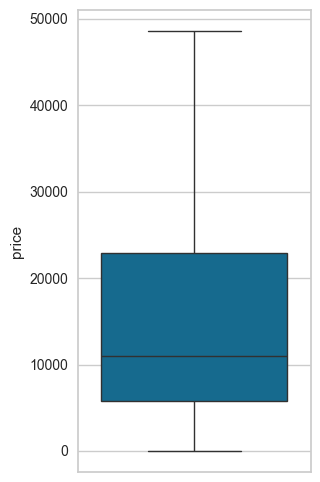

In [91]:
plt.figure(figsize=(3,6))
sns.boxplot(y='price', data=vehicles_df,showfliers=False)

In [25]:
vehicles_df.price.min()

0

In [26]:
vehicles_df.price.max()

3736928711

Price of the vehicle can never be zero. So, we will remove rows with price as 0.

In [92]:
vehicles_df = vehicles_df[vehicles_df['price']>0]

In [93]:
vehicles_df.shape

(111636, 15)

We will remove outliers of price using IQR.

In [94]:
y = vehicles_df['price']
removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
removed_outliers

31         True
32         True
33         True
34         True
35         True
          ...  
426859    False
426860     True
426866     True
426874     True
426878     True
Name: price, Length: 111636, dtype: bool

In [95]:
removed_outliers.value_counts()

price
True     100768
False     10868
Name: count, dtype: int64

In [96]:
index_names = vehicles_df[~removed_outliers].index # INVERT removed_outliers!!
print(index_names) # The resulting 10868 prices to drop.

Index([   105,    260,    339,    342,    346,    365,    410,    413,    437,
          439,
       ...
       426773, 426774, 426775, 426776, 426778, 426798, 426800, 426857, 426858,
       426859],
      dtype='int64', length=10868)


In [97]:
vehicles_df.drop(index_names, inplace=True)

### **Exploratory Data Analysis**

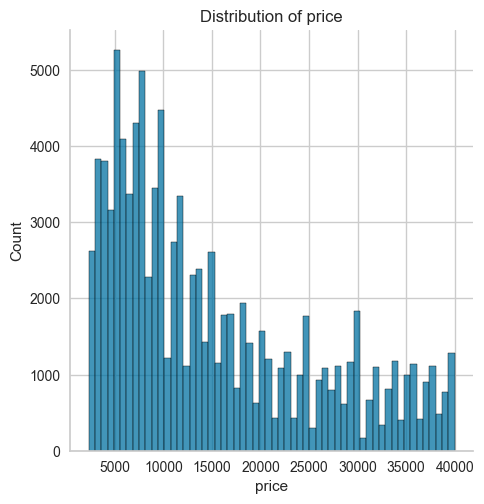

In [98]:
sns.displot(vehicles_df.price)
plt.tight_layout()
plt.title("Distribution of price")
plt.show()

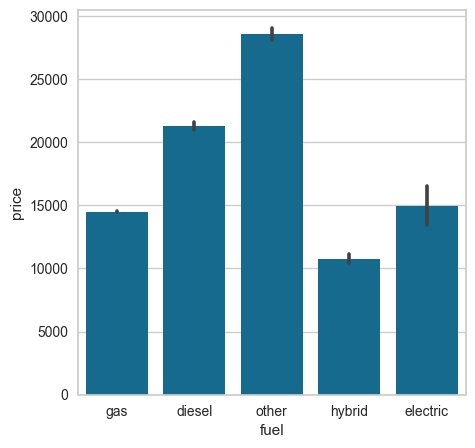

In [99]:
fig,axs=plt.subplots()
fig.set_size_inches(5,5)

p1=sns.barplot(x='fuel',y='price',data=vehicles_df,ax=axs)

plt.show()

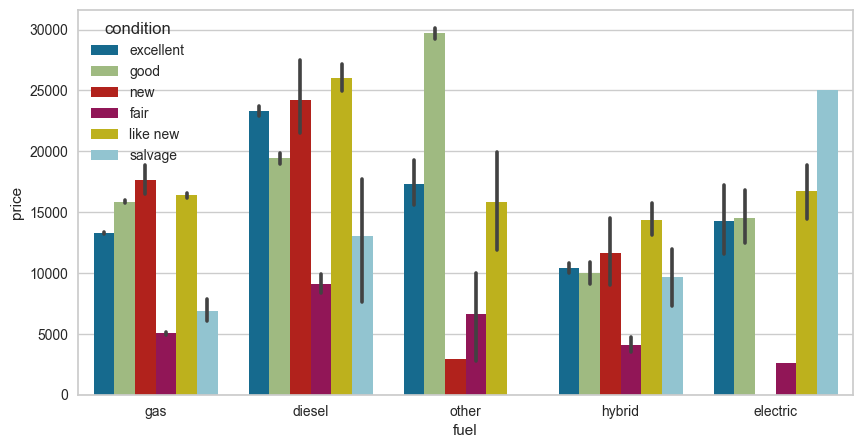

In [101]:
plt.figure(figsize=(10,5))
sns.barplot(x='fuel',y='price',hue='condition',data=vehicles_df)
plt.show()

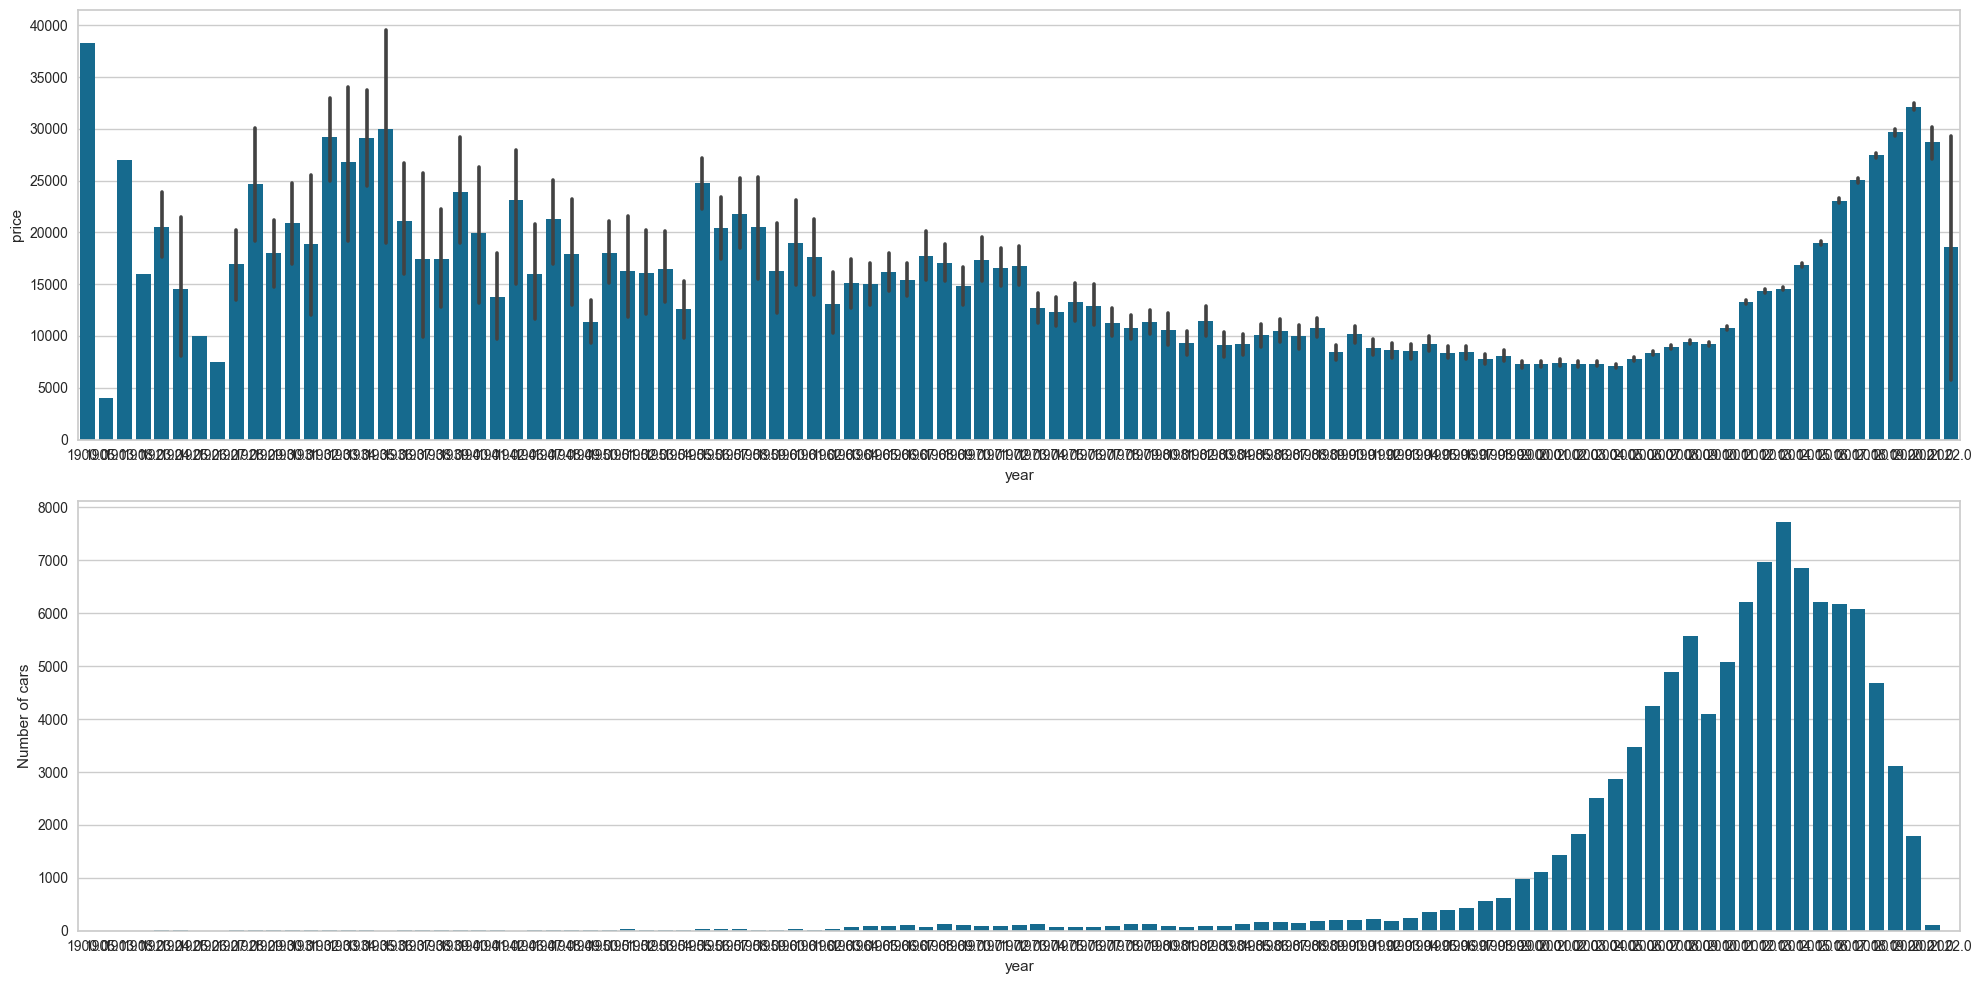

In [102]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(20,10)
sns.barplot(x='year',y='price',data=vehicles_df,ax=axs[0])
sns.barplot(x=vehicles_df.groupby('year').count()['price'].index, 
            y=vehicles_df.groupby('year').count()['price'].values, 
            ax=axs[1])

axs[1].set_ylabel('Number of cars')
plt.tight_layout()
plt.show()

C:\Users\muham\AppData\Local\Temp\ipykernel_7588\1169712229.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(vehicles_df.manufacturer.unique(),rotation=91)


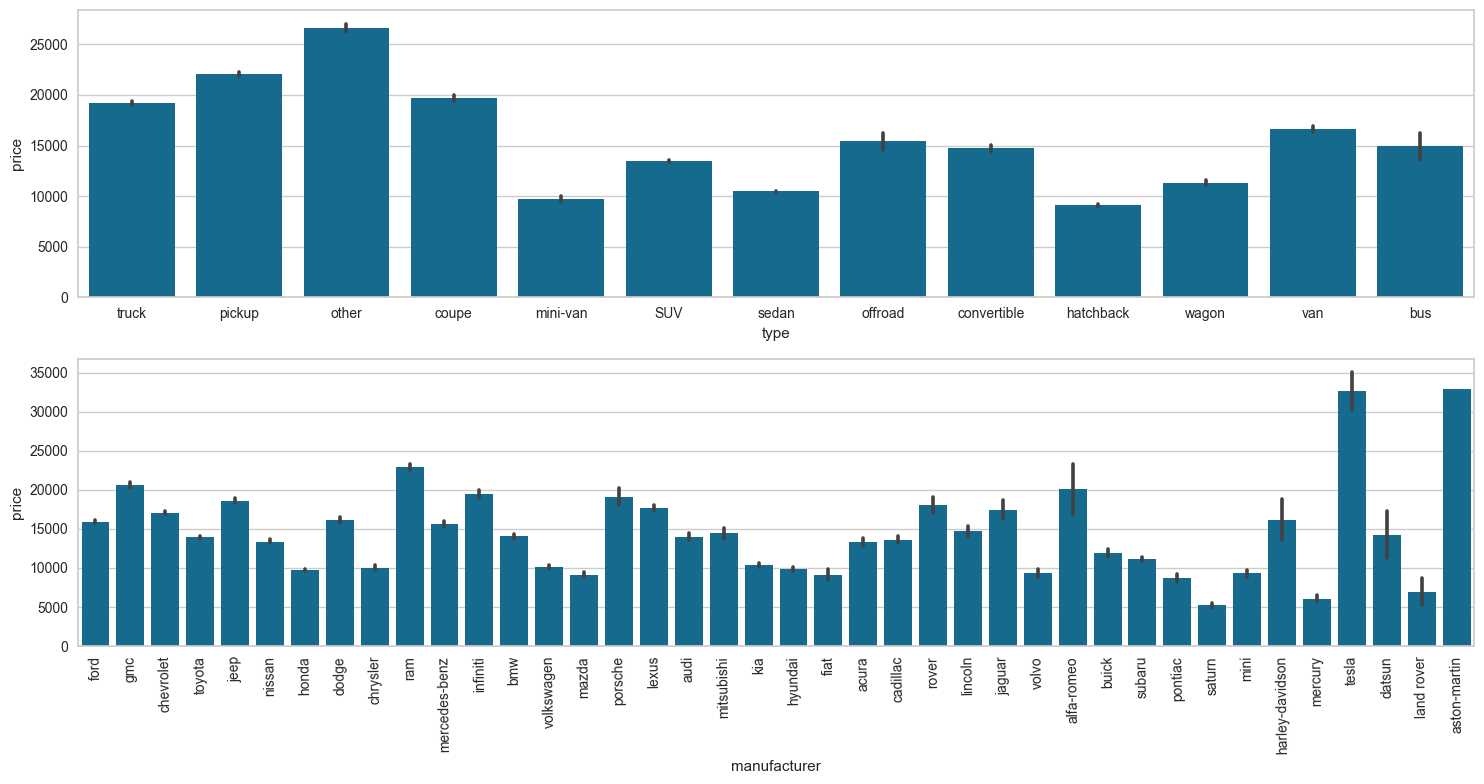

In [103]:
fig,axs=plt.subplots(nrows=2)
fig.set_size_inches(15,8)
sns.barplot(x='type',y='price',data=vehicles_df,ax=axs[0])
sns.barplot(x='manufacturer',y='price',data=vehicles_df,ax=axs[1])
axs[1].set_xticklabels(vehicles_df.manufacturer.unique(),rotation=91)
plt.tight_layout()
plt.show()

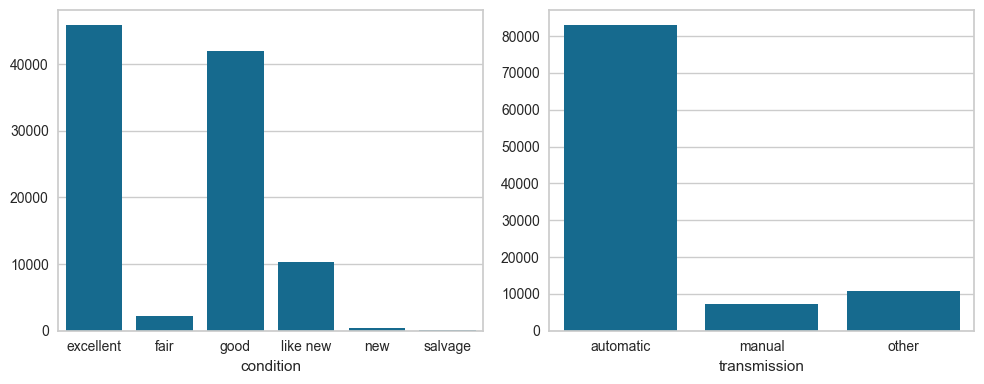

In [106]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10, 4)

# For the first plot
sns.barplot(x=vehicles_df.groupby('condition').count()['price'].index,
            y=vehicles_df.groupby('condition').count()['price'].values,
            ax=axs[0])

# For the second plot
sns.barplot(x=vehicles_df.groupby('transmission').count()['price'].index,
            y=vehicles_df.groupby('transmission').count()['price'].values,
            ax=axs[1])

# Adjust layout
plt.tight_layout()
plt.show()


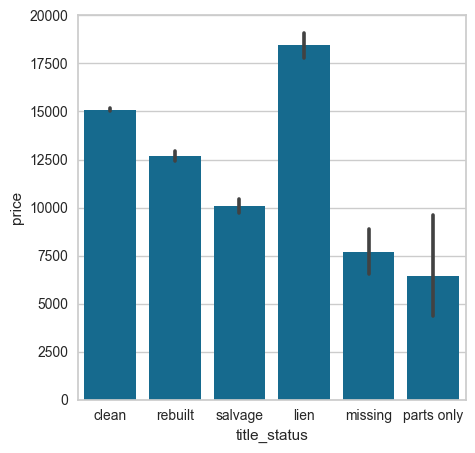

In [111]:
fig,axs=plt.subplots()
fig.set_size_inches(5,5)

p1=sns.barplot(x='title_status',y='price',data=vehicles_df,ax=axs)

plt.show()

C:\Users\muham\AppData\Local\Temp\ipykernel_7588\2775814934.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(vehicles_df.groupby('manufacturer').count()['price'].index, rotation=90)


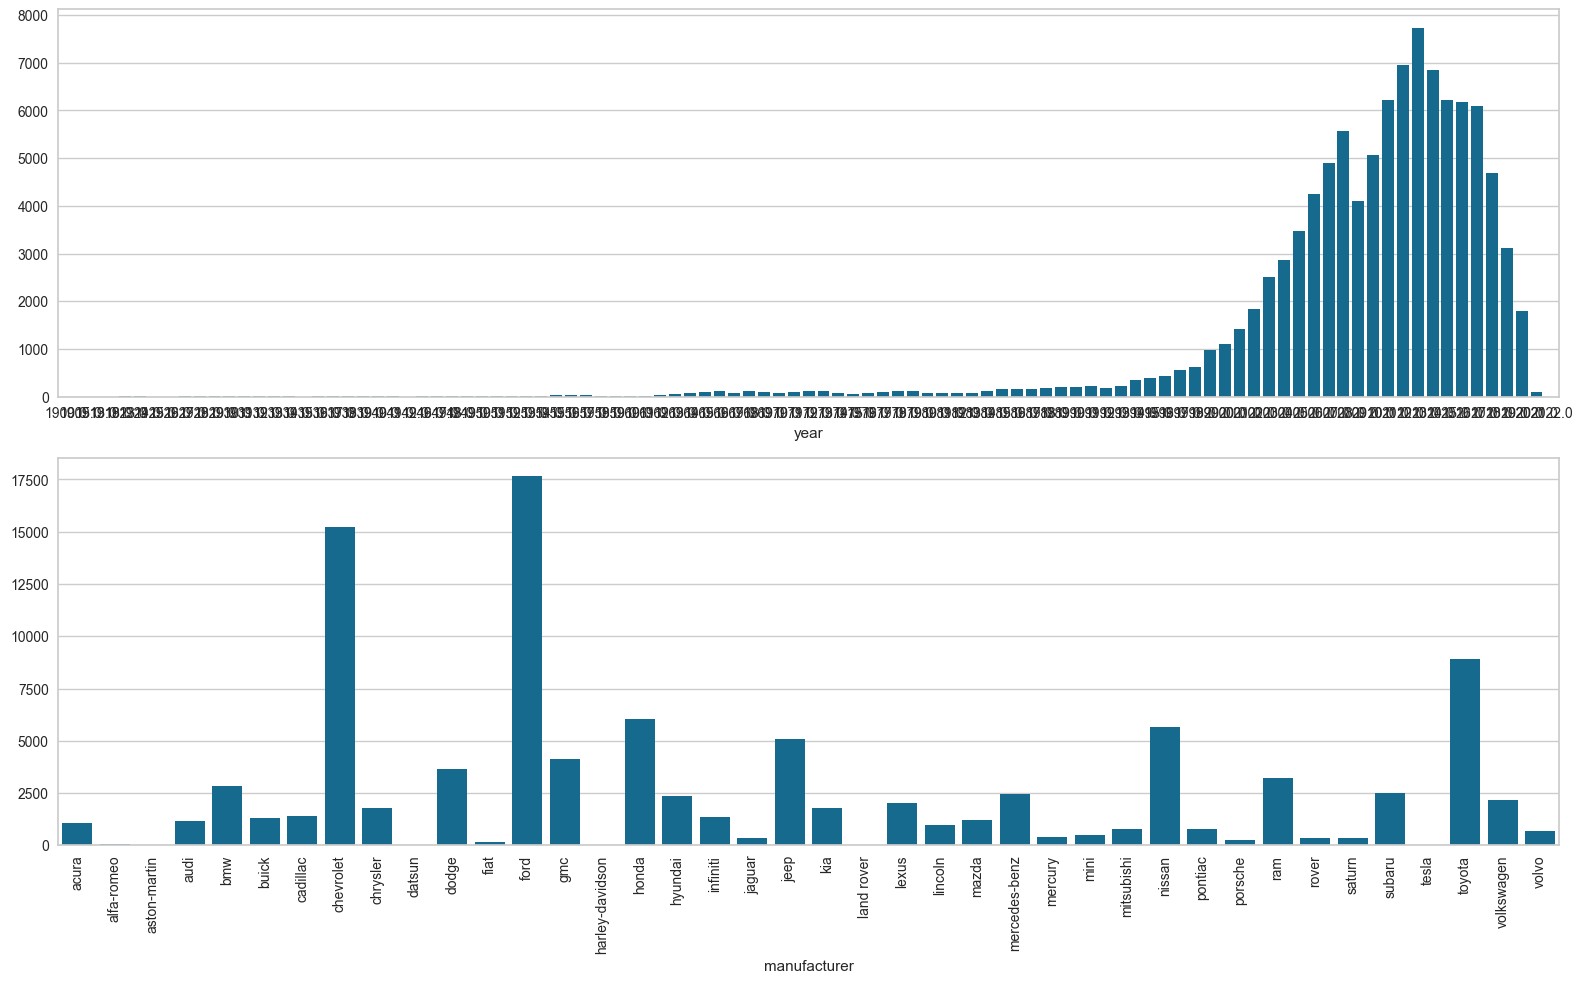

In [107]:
fig, axs = plt.subplots(nrows=2)
fig.set_size_inches(16, 10)

# For the first plot (Year vs. Count of Cars)
sns.barplot(x=vehicles_df.groupby('year').count()['price'].index,
            y=vehicles_df.groupby('year').count()['price'].values,
            ax=axs[0])

# For the second plot (Manufacturer vs. Count of Cars)
sns.barplot(x=vehicles_df.groupby('manufacturer').count()['price'].index,
            y=vehicles_df.groupby('manufacturer').count()['price'].values,
            ax=axs[1])

# Rotate x-axis labels in the second plot (Manufacturer)
axs[1].set_xticklabels(vehicles_df.groupby('manufacturer').count()['price'].index, rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()


## **Modeling**

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [48]:
#defining numerical and categorical values

num_col=['year','odometer']
cat_cols=['region','manufacturer','model','condition','cylinders','fuel','title_status','transmission','drive','type','paint_color', 'state']

**Transforming categorical columns values into integer values**

In [49]:
le=preprocessing.LabelEncoder()
vehicles_df[cat_cols]=vehicles_df[cat_cols].apply(le.fit_transform)

In [50]:
vehicles_df.head(2)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
31,16,9.615805,0.385285,12,4239,0,5,2,0.091513,0,0,2,10,0,1
32,16,10.239603,0.278875,13,8239,2,6,2,-0.246017,0,2,0,8,0,1


**Scaling Dataset**

In [51]:
from sklearn.preprocessing import StandardScaler
import numpy as np

norm = StandardScaler()

# Use .loc[] to avoid SettingWithCopyWarning
vehicles_df.loc[:, 'price'] = np.log(vehicles_df['price'])
vehicles_df.loc[:, 'odometer'] = norm.fit_transform(np.array(vehicles_df['odometer']).reshape(-1,1))
vehicles_df.loc[:, 'year'] = norm.fit_transform(np.array(vehicles_df['year']).reshape(-1,1))
vehicles_df.loc[:, 'model'] = norm.fit_transform(np.array(vehicles_df['model']).reshape(-1,1))

# Remove outliers based on price
q1, q3 = vehicles_df['price'].quantile([0.25, 0.75])
o1 = q1 - 1.5 * (q3 - q1)
o2 = q3 + 1.5 * (q3 - q1)
vehicles_df = vehicles_df[(vehicles_df['price'] >= o1) & (vehicles_df['price'] <= o2)]

# Scaling the 'region' feature
vehicles_df.loc[:, 'region'] = norm.fit_transform(np.array(vehicles_df['region']).reshape(-1, 1))


C:\Users\muham\AppData\Local\Temp\ipykernel_7588\2653970007.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.36744692  1.00627225  1.04233238 ...  0.72843755  0.04947685
 -0.50962685]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  vehicles_df.loc[:, 'model'] = norm.fit_transform(np.array(vehicles_df['model']).reshape(-1,1))
C:\Users\muham\AppData\Local\Temp\ipykernel_7588\2653970007.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.52908419 -1.52908419 -1.52908419 ...  1.70351565  1.70351565
  1.70351565]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  vehicles_df.loc[:, 'region'] = norm.fit_transform(np.array(vehicles_df['region']).reshape(-1, 1))


In [52]:
vehicles_df.head(2)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
31,-1.529084,2.263408,0.385285,12,-0.367447,0,5,2,0.091513,0,0,2,10,0,1
32,-1.529084,2.326263,0.278875,13,1.006272,2,6,2,-0.246017,0,2,0,8,0,1


In [53]:
#function to split dataset into training and test
def trainingData(vehicles_df,n):
    X = vehicles_df.iloc[:,n]
    y = vehicles_df.iloc[:,-1:].values.T
    y=y[0]
    X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.9,test_size=0.1,random_state=0)
    return (X_train,X_test,y_train,y_test)

X_train,X_test,y_train,y_test=trainingData(vehicles_df,list(range(len(list(vehicles_df.columns))-1)))

In [54]:
from sklearn.metrics import mean_squared_log_error

#some of models will predict neg values so this function will remove that values
def remove_neg(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)

#function for evaluation of model
def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

#dataframe that store the performance of each model
accu=pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)'])

### **Linear Regression**

In [55]:
#fitting model
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [56]:
#calculating error/accuracy
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r1_lr=result(y_test_1,y_pred_1)
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[0]))
print("Root MSLE : {}".format(r1_lr[1]))
print("R2 Score : {} or {}%".format(r1_lr[2],r1_lr[3]))
accu['Linear Regression']=r1_lr

Coefficients: 
 [-5.23472286e-01 -8.29456981e+00  2.73345803e-01 -2.65254475e-02
  1.39802918e-01  2.33144943e-01  2.45736265e-01 -3.01460881e-01
 -1.01547109e-01 -2.33487625e-02  3.80064255e-01 -1.14199718e+00
  8.23393270e-03 -2.81217030e-02]
MSLE : 0.8220416794862125
Root MSLE : 0.9066651418722419
R2 Score : 0.006513297476809843 or 0.6513%


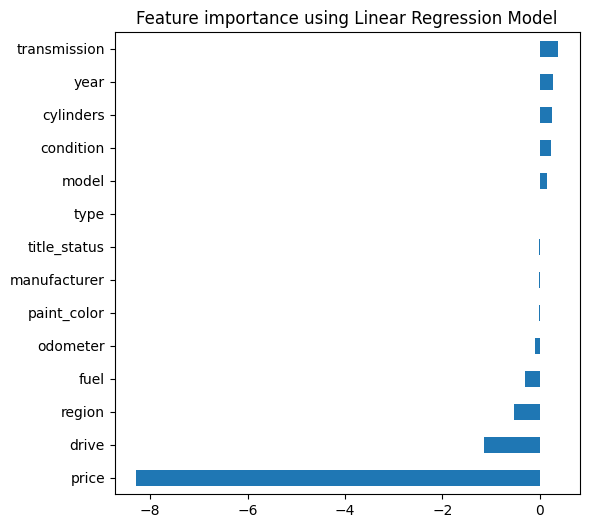

In [57]:
#Ploting feature importance graph

coef = pd.Series(LR.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()

### **Ridge regression**

c:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
c:\Users\muham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:102: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


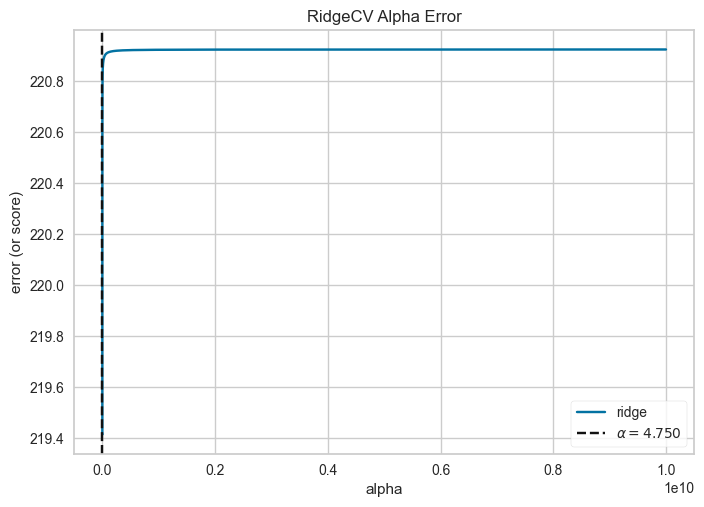

<Axes: title={'center': 'RidgeCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [60]:
#predicting value of alpha
from yellowbrick.regressor import AlphaSelection

alphas = 10**np.linspace(10,-2,400)
model = RidgeCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_train,y_train)
visualizer.show()

In [61]:
#model object and fitting model
RR=Ridge(alpha=20.336,solver='auto')
RR.fit(X_train,y_train)
y_pred=RR.predict(X_test)

In [62]:
#model evaluation

y_test_2,y_pred_2=remove_neg(y_test,y_pred)
r2_ridge=result(y_test_2,y_pred_2)
print("MSLE : {}".format(r2_ridge[0]))
print("Root MSLE : {}".format(r2_ridge[1]))
print("R2 Score : {} or {}%".format(r2_ridge[2],r2_ridge[3]))
accu['Ridge Regression']=r2_ridge

MSLE : 0.8220899552915834
Root MSLE : 0.9066917642129454
R2 Score : 0.006546885161239802 or 0.6547%


### **Random Forest**

In [68]:
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)

In [ ]:
r3_rf=result(y_test,y_pred)
print("MSLE : {}".format(r3_rf[0]))
print("Root MSLE : {}".format(r3_rf[1]))
print("R2 Score : {} or {}%".format(r3_rf[2],r3_rf[3]))
accu['RandomForest Regressor']=r3_rf

MSLE : 0.2528103818105267
Root MSLE : 0.5028025276493016
R2 Score : 0.7838447680831377 or 78.3845%


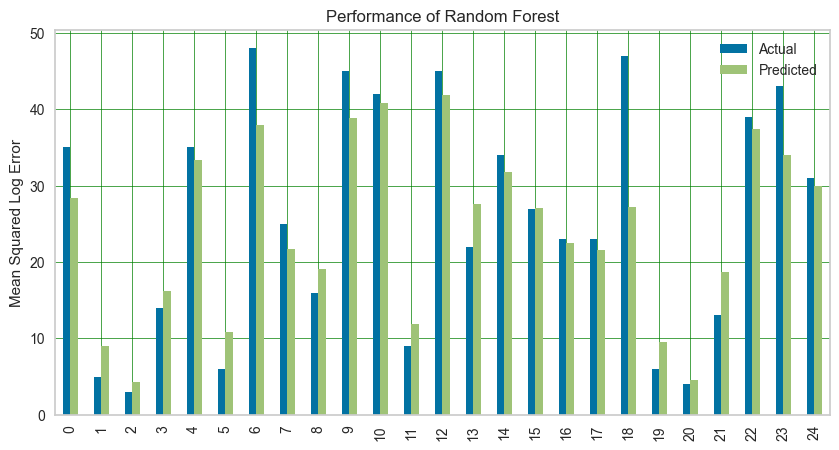

In [ ]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.head(25)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Random Forest')
plt.ylabel('Mean Squared Log Error')
plt.show()

### **Adaboost**

In [72]:
#model implementation
from sklearn.ensemble import AdaBoostRegressor

ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=200,learning_rate=0.6
)

ABR.fit(X_train, y_train)
y_pred = ABR.predict(X_test)

In [73]:
#model evaluation
r4_ab=result(y_test,y_pred)
print("MSLE : {}".format(r4_ab[0]))
print("Root MSLE : {}".format(r4_ab[1]))
print("R2 Score : {} or {}%".format(r4_ab[2],r4_ab[3]))

MSLE : 0.018574187032899377
Root MSLE : 0.1362871491847246
R2 Score : 0.9860728093753584 or 98.6073%


### **XGBOOST**

In [74]:
#model implementation and fitting data
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.4,
                max_depth = 24, alpha = 5, n_estimators = 200)
xg_reg.fit(X_train,y_train)
y_pred = xg_reg.predict(X_test)

In [75]:
#model evaluation
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r5_xg=result(y_test_1,y_pred_1)
print("MSLE : {}".format(r5_xg[0]))
print("Root MSLE : {}".format(r5_xg[1]))
print("R2 Score : {} or {}%".format(r5_xg[2],r5_xg[3]))

MSLE : 0.1518019852671062
Root MSLE : 0.38961774249526443
R2 Score : 0.7974779605865479 or 79.7478%


## **Evaluation**

**Evaluation**

By considering all the models, it is evident that the **AdaBoost Regressor** is doing great, with the following scores:

- **MSLE (Mean Squared Log Error):** 0.0186
- **Root MSLE:** 0.1363
- **R² Score:** 0.9861 (or 98.61%)

This implies that the AdaBoost model explains more than 98% of the variance in the target variable, while the error rates for other models are significantly low as compared to Linear Regression and Ridge Regression, which have very poor performances with R² scores of around 0.65%.

The performance of the AdaBoost model would be used to show the ability in terms of relating features in use to car prices that is most fitting among these models implemented. There isn't a need for revisiting the earlier steps of pre-processing or even modeling in light of the business objective presented since the model already aligns with one that provides useful insights towards the drivers behind used car prices.

Summary In summary, the AdaBoost model stood out as the best among the models in the notebook. It is the model that produces the greatest robust predictions and actionable insights for deployment with the client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

More information in document report